In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

In [3]:
np.random.seed(17345432)

X = np.random.rand(8,2)
print(X)

[[0.93573039 0.67031042]
 [0.85490932 0.02679471]
 [0.13928423 0.20182699]
 [0.1540053  0.38037399]
 [0.96486171 0.83347654]
 [0.44357991 0.8453831 ]
 [0.29343787 0.1287859 ]
 [0.31865797 0.67921751]]


In [4]:
class myHierarchicalClustering(object):
    
        
    def computeDistancesBetweenClusters(self,samples):
        
    
        distanceMatrix = np.zeros((len(samples),len(samples)))

      
        loo = list(product(range(distanceMatrix.shape[0]), range(distanceMatrix.shape[0])))
        for k in range(len(loo)):
          i, j = loo[k]
        
          if(i == j):
            distanceMatrix[i,j] = 10**4
          else:
            
            distanceMatrix[i,j] = float(self.calculateDistanceBetweenPointsForClusters(samples[i],samples[j]))

        return distanceMatrix
    
    
    def calculateDistanceBetweenPointsForClusters(self,sample1,sample2):
        
        
        distance = []
        
      
        loo3 = list(product(range(len(sample1)), range(len(sample2))))

        for h in range(len(loo3)):
          i, j = loo3[h]
          try:
            
            distance.append(np.linalg.norm(np.array(sample1[i]) - np.array(sample2[j])))
          except:
           
            distance.append(self.interSampleDistance(sample1[i], sample2[j]))
        return min(distance)

    def interSampleDistance(self,s1,s2):
        
      
        print("type s2 : ",type(s2[0]))
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]

        distance = []
        a = len(s1)
        b = len(s2)
        
        
        if a >=b:
          loo4 = list(product(range(len(a)), range(len(b))))
        else:
          loo4 = list(product(range(len(b)), range(len(a))))

        for l in range(len(loo4)):
          i, j = loo4[l]

          if a >= b:
            if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
              dist.append(self.interClusterDistance(s1[i],s2[j]))
            else:
              dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
          else:
            if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
              dist.append(self.interClusterDistance(s2[i],s1[j]))
            else:
              dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))

        return min(distance)
    
    def interClusterDistance(self,cl,sample):
        
        if sample[0]!='<class \'list\'>':
            sample = [sample]
       
        distance = []
        
        loo5 = list(product(range(len(cl)), range(len(sample))))

        for q in range(len(loo5)):
          i, j = loo5[q]
          distance.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(distance)
    
    

In [5]:
clustersIndex = [[i] for i in range(X.shape[0])]
actualClusters     = [[list(X[i])] for i in range(X.shape[0])]

actClustLen = len(actualClusters)
inst1  = myHierarchicalClustering()

print('\n')
while actClustLen > 1:
    print('Cluster size before current iteration    :- ', actClustLen)
    distanceMatLV      = inst1.computeDistancesBetweenClusters(actualClusters)
    minIdex = np.where(distanceMatLV==distanceMatLV.min())[0]
    valueToAdd      = actualClusters.pop(minIdex[1])
    actualClusters[minIdex[0]].append(valueToAdd)
    
    print('Cluster Node 1 :-' , clustersIndex[minIdex[0]])
    print('Cluster Node 2 :-' , clustersIndex[minIdex[1]])
    
    clustersIndex[minIdex[0]].append(clustersIndex[minIdex[1]])
    clustersIndex[minIdex[0]] = [clustersIndex[minIdex[0]]]
    v = clustersIndex.pop(minIdex[1])
    actClustLen = len(actualClusters)
    
    print('A look at the current clusters :-',clustersIndex)
    print(' cluster attained at the current iteration :-',clustersIndex[minIdex[0]])
    print('Cluster size after current iteration     :-',actClustLen)
    print('\n')
    print("*" * 40)
    print('\n')



Cluster size before current iteration    :-  8
Cluster Node 1 :- [0]
Cluster Node 2 :- [4]
A look at the current clusters :- [[[0, [4]]], [1], [2], [3], [5], [6], [7]]
 cluster attained at the current iteration :- [[0, [4]]]
Cluster size after current iteration     :- 7


****************************************


Cluster size before current iteration    :-  7
Cluster Node 1 :- [2]
Cluster Node 2 :- [6]
A look at the current clusters :- [[[0, [4]]], [1], [[2, [6]]], [3], [5], [7]]
 cluster attained at the current iteration :- [[2, [6]]]
Cluster size after current iteration     :- 6


****************************************


Cluster size before current iteration    :-  6
Cluster Node 1 :- [[2, [6]]]
Cluster Node 2 :- [3]
A look at the current clusters :- [[[0, [4]]], [1], [[[2, [6]], [3]]], [5], [7]]
 cluster attained at the current iteration :- [[[2, [6]], [3]]]
Cluster size after current iteration     :- 5


****************************************


Cluster size before current it

TypeError: object of type 'int' has no len()

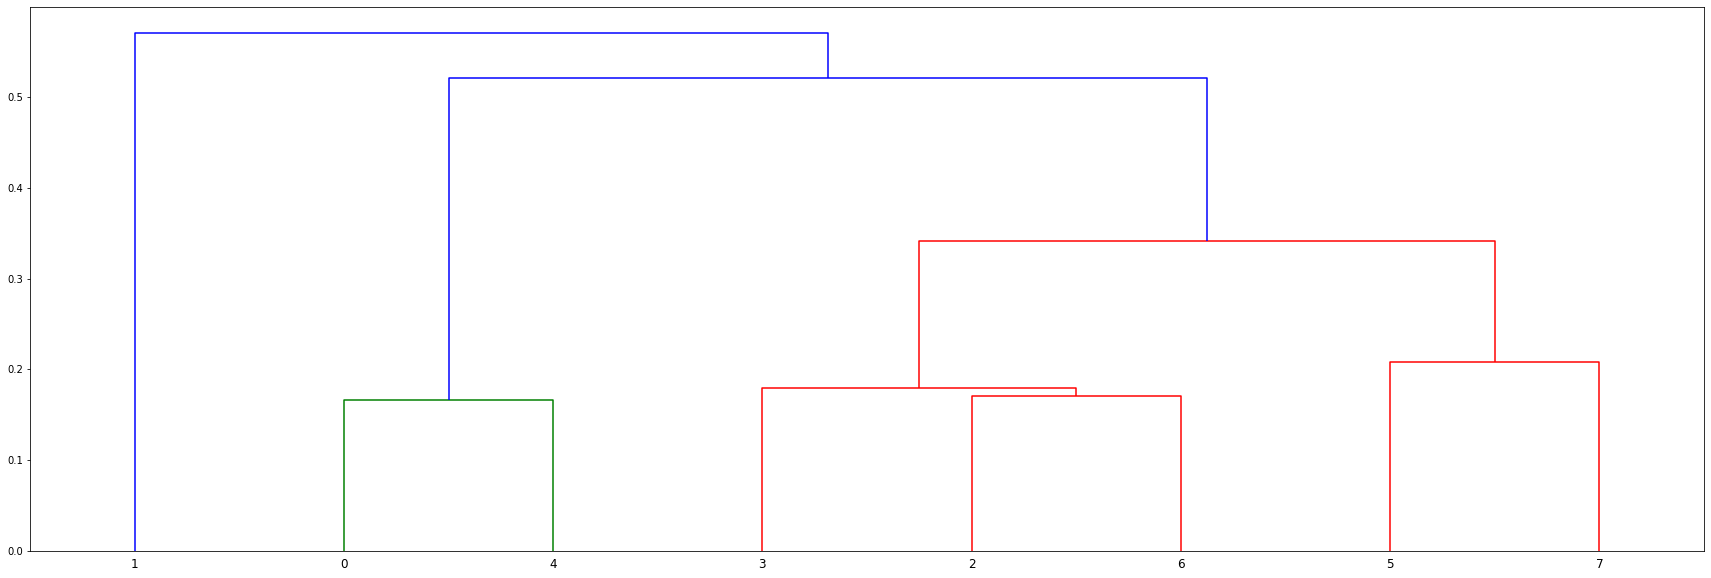

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(30, 10))
dn = dendrogram(Z)